In [1]:
import pandas as pd
import numpy as np
import yfinance  as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der
figsize = (12, 8) 

In [2]:
symbols_list_good = ["APAM", "TMV", "PSK", "WPM", "TPL"]
symbols_list_poor = ["CIA", "CLF", "ATI", "EVR", "CRS"]
count_good = len(symbols_list_good)
count_poor = len(symbols_list_poor)
symbols_good = []
symbols_poor = []

for ticker in symbols_list_good:
    tick = yf.Ticker(ticker)
    history = tick.history(period='max')
    history['Symbol'] = ticker
    symbols_good.append(history)
    
for ticker in symbols_list_poor:
    tick = yf.Ticker(ticker)
    history = tick.history(period='max')
    history['Symbol'] = ticker
    symbols_poor.append(history)

df = pd.concat(symbols_good)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df = df.drop_duplicates()
price_good = df.pivot('Date','Symbol','Close').reset_index()
price_good.index = price_good.Date
price_good.drop(columns=['Date'], inplace=True)  

df = pd.concat(symbols_poor)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df = df.drop_duplicates()
price_poor = df.pivot('Date','Symbol','Close').reset_index()
price_poor.index = price_poor.Date
price_poor.drop(columns=['Date'], inplace=True) 

In [3]:
price_good

Symbol,APAM,PSK,TMV,TPL,WPM
Date,,,,,
1980-03-17 00:00:00-05:00,NaN,NaN,NaN,4.629040,NaN
1980-03-18 00:00:00-05:00,NaN,NaN,NaN,4.397590,NaN
1980-03-19 00:00:00-05:00,NaN,NaN,NaN,4.496782,NaN
1980-03-20 00:00:00-05:00,NaN,NaN,NaN,4.513314,NaN
1980-03-21 00:00:00-05:00,NaN,NaN,NaN,4.529846,NaN
...,...,...,...,...,...
2023-05-01 00:00:00-04:00,34.560001,33.990002,115.629997,1477.140015,48.900002
2023-05-02 00:00:00-04:00,33.400002,33.410000,107.300003,1435.979980,51.000000
2023-05-03 00:00:00-04:00,32.939999,32.849998,105.529999,1433.150024,50.669998


In [4]:
price_poor

Symbol,ATI,CIA,CLF,CRS,EVR
Date,,,,,
1973-02-21 00:00:00-05:00,NaN,NaN,0.836691,1.005395,NaN
1973-02-22 00:00:00-05:00,NaN,NaN,0.839934,1.010829,NaN
1973-02-23 00:00:00-05:00,NaN,NaN,0.836406,1.032568,NaN
1973-02-26 00:00:00-05:00,NaN,NaN,0.823337,1.005395,NaN
1973-02-27 00:00:00-05:00,NaN,NaN,0.820070,1.005395,NaN
...,...,...,...,...,...
2023-05-01 00:00:00-04:00,37.919998,1.9100,15.210000,51.599998,111.470001
2023-05-02 00:00:00-04:00,38.310001,1.8700,15.280000,54.340000,108.699997
2023-05-03 00:00:00-04:00,38.000000,1.7600,15.010000,52.130001,107.750000


# Monthly Price

In [5]:
month_price_good = price_good.resample("1 m").agg("last")
month_price_poor = price_poor.resample("1 m").agg("last")

In [6]:
month_price_good

Symbol,APAM,PSK,TMV,TPL,WPM
Date,,,,,
1980-03-31 00:00:00-05:00,NaN,NaN,NaN,3.967749,NaN
1980-04-30 00:00:00-04:00,NaN,NaN,NaN,4.629040,NaN
1980-05-31 00:00:00-04:00,NaN,NaN,NaN,4.959686,NaN
1980-06-30 00:00:00-04:00,NaN,NaN,NaN,4.926622,NaN
1980-07-31 00:00:00-04:00,NaN,NaN,NaN,5.918560,NaN
...,...,...,...,...,...
2023-01-31 00:00:00-05:00,35.899502,35.885250,107.183395,1992.289917,45.590588
2023-02-28 00:00:00-05:00,32.970001,34.925434,124.760437,1777.014526,41.513950
2023-03-31 00:00:00-04:00,31.980000,33.427307,107.209999,1701.020020,48.160000


In [7]:
month_price_poor

Symbol,ATI,CIA,CLF,CRS,EVR
Date,,,,,
1973-02-28 00:00:00-05:00,NaN,NaN,0.816802,1.016264,NaN
1973-03-31 00:00:00-05:00,NaN,NaN,0.757993,1.010829,NaN
1973-04-30 00:00:00-04:00,NaN,NaN,0.807001,1.021699,NaN
1973-05-31 00:00:00-04:00,NaN,NaN,0.774329,0.907573,NaN
1973-06-30 00:00:00-04:00,NaN,NaN,0.803734,0.902139,NaN
...,...,...,...,...,...
2023-01-31 00:00:00-05:00,36.389999,2.4000,21.350000,48.106876,129.068817
2023-02-28 00:00:00-05:00,40.650002,2.9500,21.330000,48.146725,131.179993
2023-03-31 00:00:00-04:00,39.459999,3.7100,18.330000,44.590260,115.379997


In [8]:
month_ret_good = month_price_good.pct_change()
month_ret_good = month_ret_good.iloc[-61:-1]
month_ret_good

Symbol,APAM,PSK,TMV,TPL,WPM
Date,,,,,
2018-05-31 00:00:00-04:00,0.023415,0.011268,-0.059903,0.296983,0.055784
2018-06-30 00:00:00-04:00,-0.066563,0.013759,-0.019744,-0.016060,0.009149
2018-07-31 00:00:00-04:00,0.142620,-0.002542,0.045622,0.064327,-0.050317
2018-08-31 00:00:00-04:00,-0.019693,0.013734,-0.036610,0.127729,-0.175864
2018-09-30 00:00:00-04:00,-0.022624,-0.016609,0.091691,0.033489,0.018627
2018-10-31 00:00:00-04:00,-0.154012,-0.020034,0.092256,-0.118763,-0.061143
2018-11-30 00:00:00-05:00,0.016420,-0.025132,-0.049891,-0.238028,-0.042626
2018-12-31 00:00:00-05:00,-0.188028,-0.005392,-0.157856,-0.064849,0.248721
2019-01-31 00:00:00-05:00,0.054726,0.060920,-0.007680,0.283921,0.079365


In [9]:
month_ret_poor = month_price_poor.pct_change()
month_ret_poor = month_ret_poor.iloc[-61:-1]
month_ret_poor

Symbol,ATI,CIA,CLF,CRS,EVR
Date,,,,,
2018-05-31 00:00:00-04:00,0.073391,-0.046332,0.140162,0.125422,0.035822
2018-06-30 00:00:00-04:00,-0.119215,0.051282,-0.003546,-0.122956,0.010057
2018-07-31 00:00:00-04:00,0.106688,0.015404,0.279952,0.041849,0.071598
2018-08-31 00:00:00-04:00,-0.027698,0.061947,-0.068582,0.093211,-0.056172
2018-09-30 00:00:00-04:00,0.093230,0.000000,0.259702,-0.012066,-0.052755
2018-10-31 00:00:00-04:00,-0.123858,-0.064286,-0.150079,-0.257402,-0.187569
2018-11-30 00:00:00-05:00,0.014291,0.005089,-0.137547,-0.012153,0.016698
2018-12-31 00:00:00-05:00,-0.170982,-0.048101,-0.171336,-0.173399,-0.133236
2019-01-31 00:00:00-05:00,0.258153,-0.057181,0.401634,0.327155,0.250000


# Mean and Std

In [10]:
mean_good = month_ret_good.mean() * 12
mean_poor = month_ret_poor.mean() * 12
print(mean_good, mean_poor)

Symbol
APAM    0.199225
PSK     0.020415
TMV    -0.024964
TPL     0.375760
WPM     0.253247
dtype: float64 Symbol
ATI    0.217853
CIA   -0.181066
CLF    0.376969
CRS    0.172867
EVR    0.127372
dtype: float64


In [11]:
std_good = month_ret_good.std() * np.sqrt(12)
std_poor = month_ret_poor.std() * np.sqrt(12)
print(std_good, std_poor)

Symbol
APAM    0.420635
PSK     0.119353
TMV     0.445649
TPL     0.578978
WPM     0.370604
dtype: float64 Symbol
ATI    0.528737
CIA    0.422195
CLF    0.683722
CRS    0.552376
EVR    0.395849
dtype: float64


# Distribution Chart - Good ESG Performance

In [12]:
month_ret_good.columns 

Index(['APAM', 'PSK', 'TMV', 'TPL', 'WPM'], dtype='object', name='Symbol')

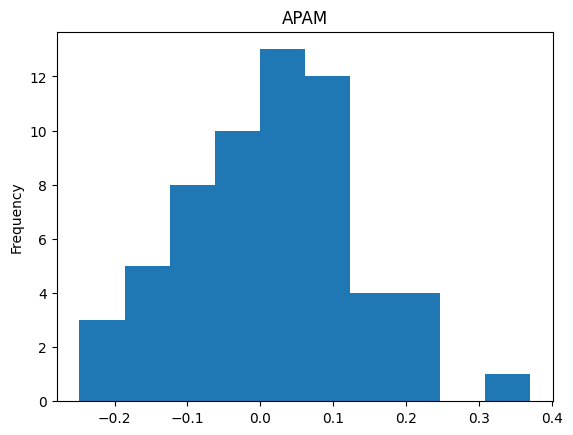

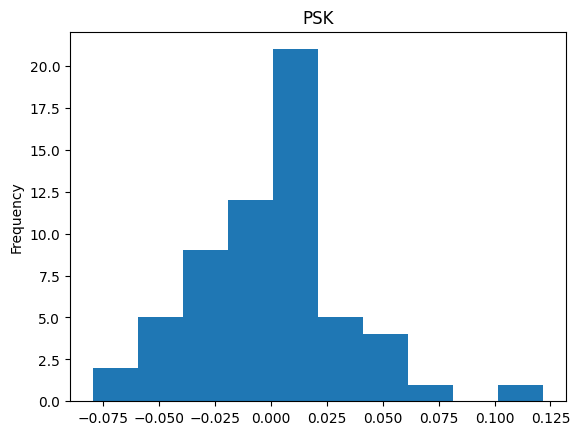

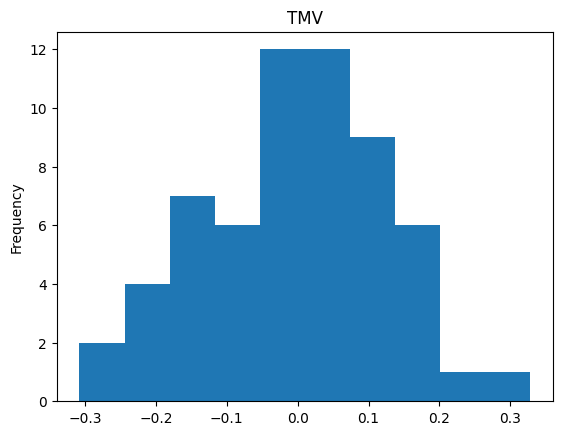

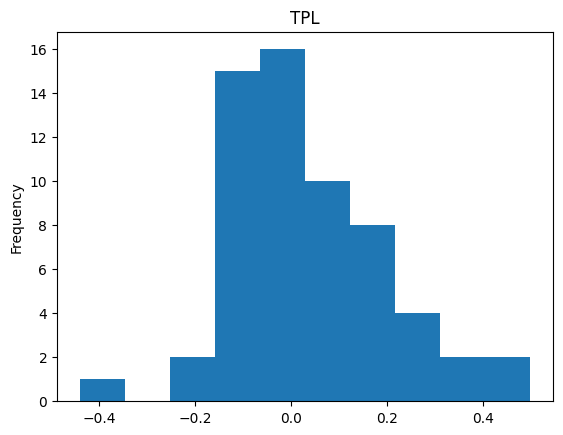

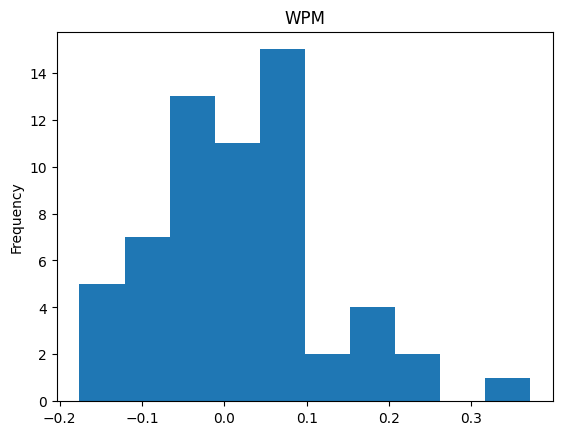

In [13]:
for symbol in month_ret_good.columns:
    month_ret_good[symbol].plot.hist()
    plt.title(symbol)
    plt.show()

# Distribution Chart - Poor ESG Performance

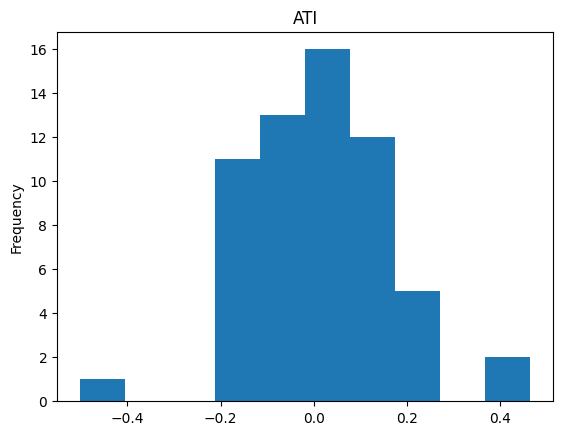

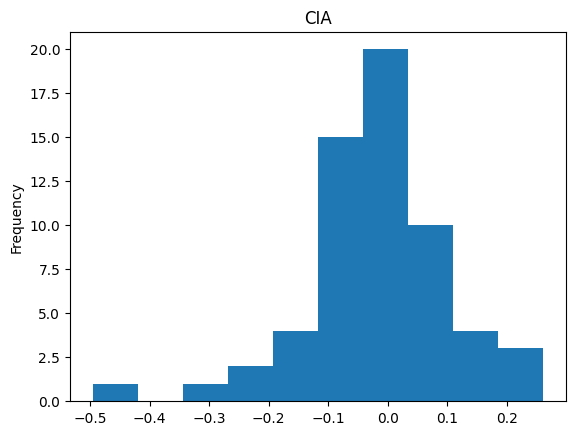

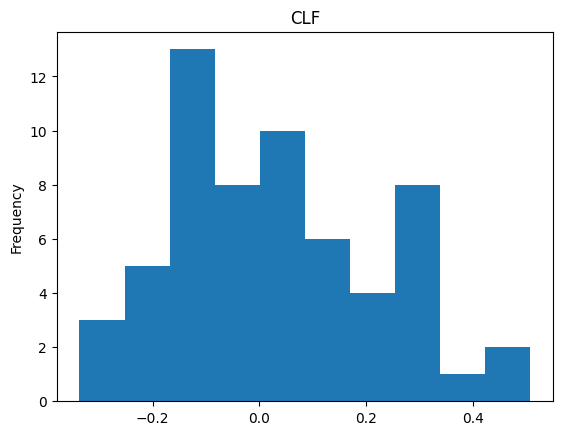

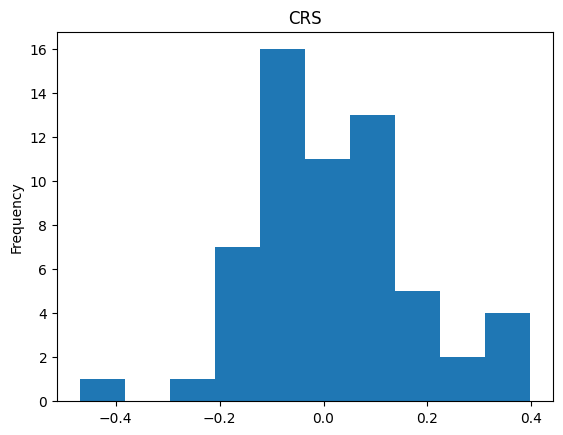

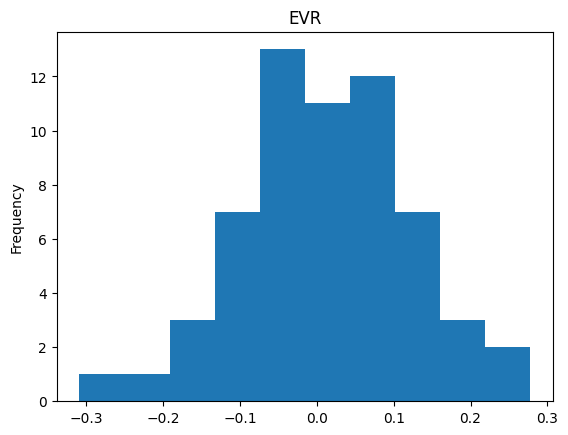

In [14]:
for symbol in month_ret_poor.columns:
    month_ret_poor[symbol].plot.hist()
    plt.title(symbol)
    plt.show()

# Covariance

In [15]:
cov_good = month_ret_good.cov()

# Alternative
# cov_good_matrix = month_ret_good.apply(lambda x: np.log(1+x)).cov()

cov_good

Symbol,APAM,PSK,TMV,TPL,WPM
Symbol,,,,,
APAM,0.014744,0.003037,-0.000855,0.010675,0.003533
PSK,0.003037,0.001187,-0.001353,0.002021,0.001495
TMV,-0.000855,-0.001353,0.016550,0.006364,-0.004634
TPL,0.010675,0.002021,0.006364,0.027935,0.001989
WPM,0.003533,0.001495,-0.004634,0.001989,0.011446


In [16]:
cov_poor = month_ret_poor.cov()
cov_poor

Symbol,ATI,CIA,CLF,CRS,EVR
Symbol,,,,,
ATI,0.023297,-0.000251,0.017828,0.019654,0.010675
CIA,-0.000251,0.014854,0.002120,-0.002786,-0.000269
CLF,0.017828,0.002120,0.038956,0.017465,0.013899
CRS,0.019654,-0.002786,0.017465,0.025427,0.012053
EVR,0.010675,-0.000269,0.013899,0.012053,0.013058


# Assets

In [17]:
assets_good = pd.concat([mean_good, std_good], axis=1)
assets_good.columns = ['Returns', 'Volatility']
assets_good

,Returns,Volatility
Symbol,,
APAM,0.199225,0.420635
PSK,0.020415,0.119353
TMV,-0.024964,0.445649
TPL,0.375760,0.578978
WPM,0.253247,0.370604


In [18]:
assets_poor = pd.concat([mean_poor, std_poor], axis=1)
assets_poor.columns = ['Returns', 'Volatility']
assets_poor

,Returns,Volatility
Symbol,,
ATI,0.217853,0.528737
CIA,-0.181066,0.422195
CLF,0.376969,0.683722
CRS,0.172867,0.552376
EVR,0.127372,0.395849


In [19]:
p_ret_good = []
p_vol_good = []
p_weights_good = []

p_ret_poor = []
p_vol_poor = []
p_weights_poor = []

num_assets_good = len(price_good.columns)
num_assets_poor = len(price_poor.columns)

num_portfolios = 10000

In [20]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets_good)
    weights = weights/np.sum(weights)
    p_weights_good.append(weights)
    returns = np.dot(weights, mean_good)
    p_ret_good.append(returns)
    var = np.dot(weights.T, np.dot(cov_good, weights))
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(12)
    p_vol_good.append(ann_sd)

In [21]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets_poor)
    weights = weights/np.sum(weights)
    p_weights_poor.append(weights)
    returns = np.dot(weights, mean_poor)
    p_ret_poor.append(returns)
    var = np.dot(weights.T, np.dot(cov_poor, weights))
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(12)
    p_vol_poor.append(ann_sd)

In [22]:
data_good = {'Returns':p_ret_good, 'Volatility':p_vol_good}
pd.DataFrame( data_good )

,Returns,Volatility
0,0.189998,0.360511
1,0.103539,0.201709
2,0.167474,0.227986
3,0.161679,0.256360
4,0.154933,0.251195
...,...,...
9995,0.115558,0.209907
9996,0.177873,0.259943
9997,0.181194,0.253166
9998,0.242595,0.321998


In [23]:
data_poor = {'Returns':p_ret_poor, 'Volatility':p_vol_poor}
pd.DataFrame( data_poor )

,Returns,Volatility
0,0.186438,0.410998
1,0.196175,0.432983
2,0.092415,0.335460
3,0.111685,0.355976
4,0.052407,0.330130
...,...,...
9995,0.120163,0.372910
9996,0.112348,0.364061
9997,0.103552,0.348311
9998,0.130764,0.370507


In [24]:
for counter, symbol in enumerate(price_good.columns.tolist()):
    data_good[symbol+' weight'] = [w[counter] for w in p_weights_good]
    
for counter, symbol in enumerate(price_poor.columns.tolist()):
    data_poor[symbol+' weight'] = [w[counter] for w in p_weights_poor]

In [25]:
rf = 0.015

portfolios_good = pd.DataFrame(data_good)
portfolios_good['Sharpe Ratio'] = (portfolios_good['Returns']-rf) / portfolios_good['Volatility']
portfolios_good.head()

,Returns,Volatility,APAM weight,PSK weight,TMV weight,TPL weight,WPM weight,Sharpe Ratio
0,0.189998,0.360511,0.104879,0.058547,0.354408,0.446062,0.036104,0.485417
1,0.103539,0.201709,0.317486,0.245087,0.275106,0.008527,0.153794,0.438943
2,0.167474,0.227986,0.194868,0.160060,0.209155,0.164967,0.270950,0.668788
3,0.161679,0.256360,0.273421,0.062493,0.299796,0.172709,0.191582,0.572160
4,0.154933,0.251195,0.073478,0.155879,0.318612,0.249690,0.202341,0.557069


In [26]:
portfolios_poor = pd.DataFrame(data_poor)
portfolios_poor['Sharpe Ratio'] = (portfolios_poor['Returns']-rf) / portfolios_poor['Volatility']
portfolios_poor.head()

,Returns,Volatility,ATI weight,CIA weight,CLF weight,CRS weight,EVR weight,Sharpe Ratio
0,0.186438,0.410998,0.261658,0.052978,0.187450,0.108675,0.389239,0.417127
1,0.196175,0.432983,0.139688,0.076039,0.266582,0.287490,0.230200,0.418435
2,0.092415,0.335460,0.140207,0.271078,0.102672,0.227303,0.258740,0.230774
3,0.111685,0.355976,0.078824,0.316843,0.297498,0.014335,0.292500,0.271605
4,0.052407,0.330130,0.016784,0.377907,0.084580,0.416889,0.103840,0.113311


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

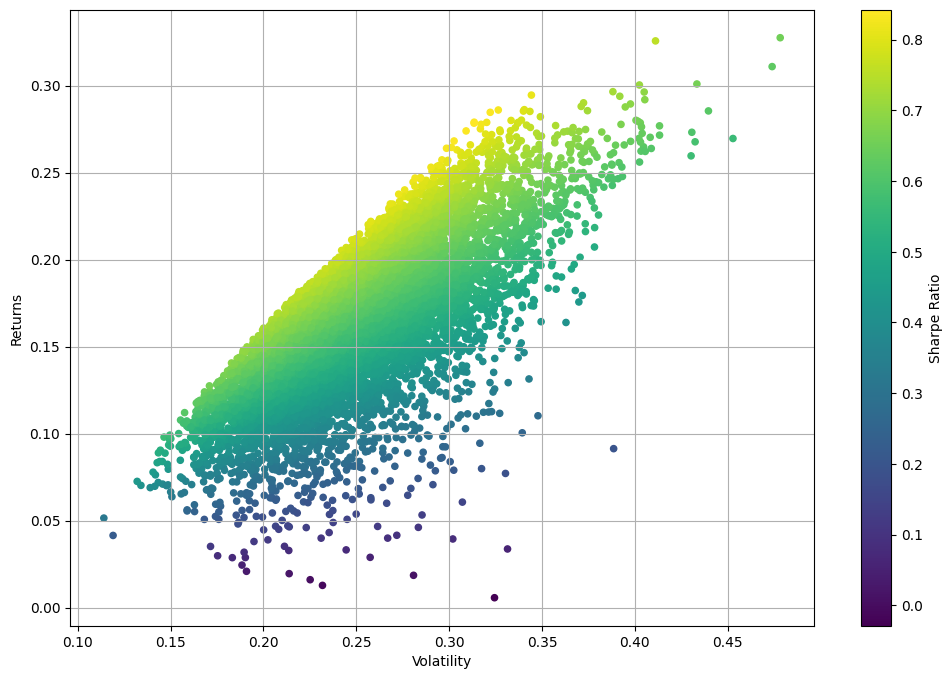

In [27]:
portfolios_good.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

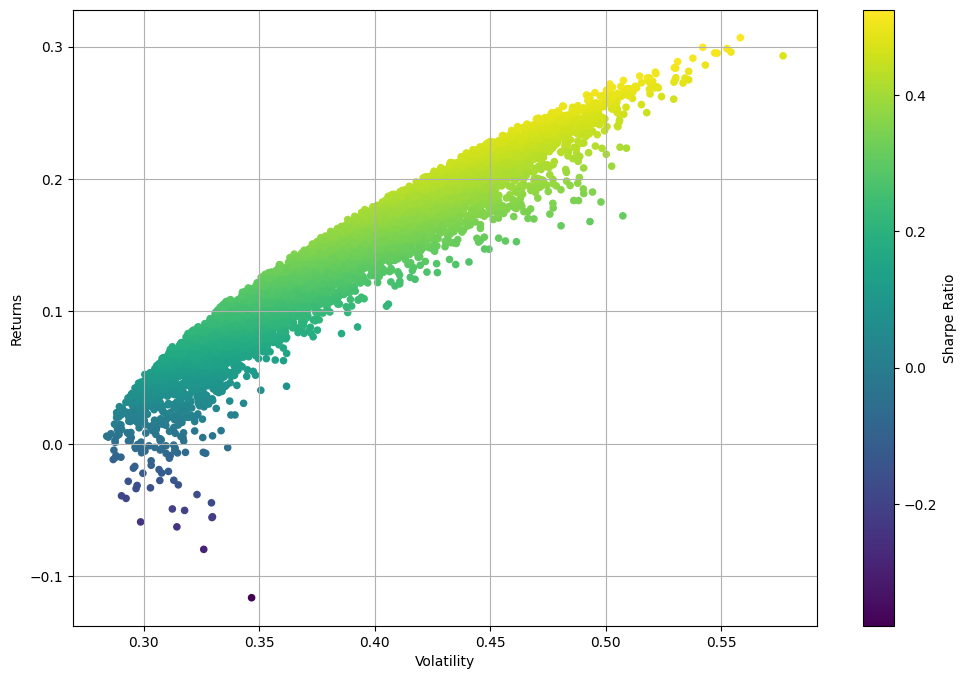

In [28]:
portfolios_poor.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)

# Minimun Variance

In [29]:
portfolios_good[portfolios_good['Volatility']==portfolios_good['Volatility'].min()]

,Returns,Volatility,APAM weight,PSK weight,TMV weight,TPL weight,WPM weight,Sharpe Ratio
9205,0.051427,0.114067,0.01124,0.717318,0.122947,0.000063,0.148432,0.319351


In [30]:
portfolios_poor[portfolios_poor['Volatility']==portfolios_poor['Volatility'].min()]

,Returns,Volatility,ATI weight,CIA weight,CLF weight,CRS weight,EVR weight,Sharpe Ratio
5465,0.005768,0.283946,0.030895,0.428285,0.007694,0.127021,0.406105,-0.032515


In [31]:
min_var_port_good = portfolios_good.iloc[portfolios_good['Volatility'].idxmin()]
min_var_port_good

Returns         0.051427
Volatility      0.114067
APAM weight     0.011240
PSK weight      0.717318
TMV weight      0.122947
TPL weight      0.000063
WPM weight      0.148432
Sharpe Ratio    0.319351
Name: 9205, dtype: float64

In [32]:
min_var_port_poor = portfolios_poor.iloc[portfolios_poor['Volatility'].idxmin()]
min_var_port_poor

Returns         0.005768
Volatility      0.283946
ATI weight      0.030895
CIA weight      0.428285
CLF weight      0.007694
CRS weight      0.127021
EVR weight      0.406105
Sharpe Ratio   -0.032515
Name: 5465, dtype: float64

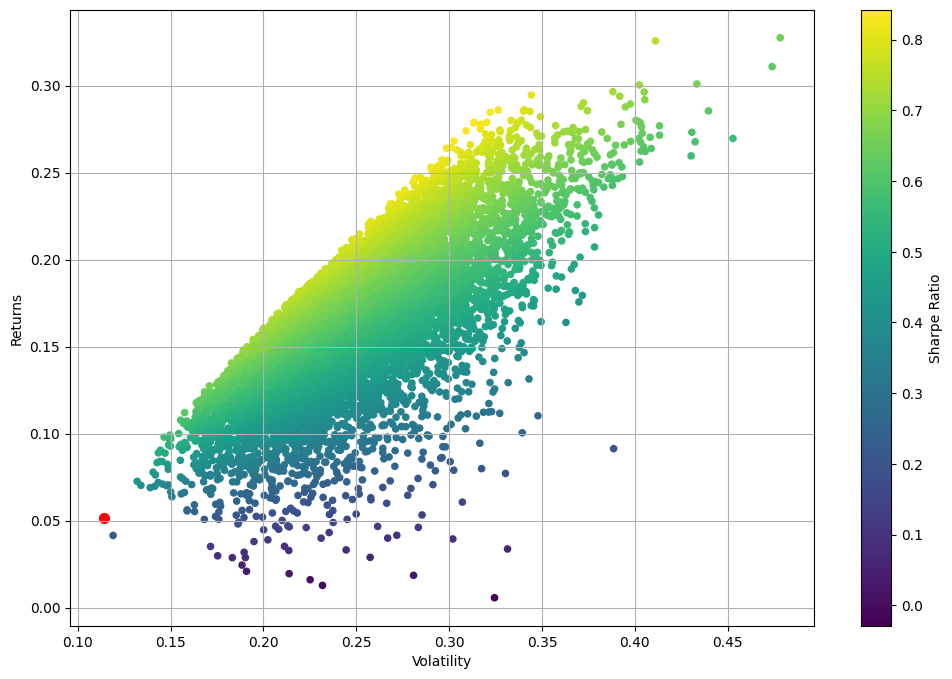

In [33]:
portfolios_good.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port_good[1], min_var_port_good[0], color='r', s=50)

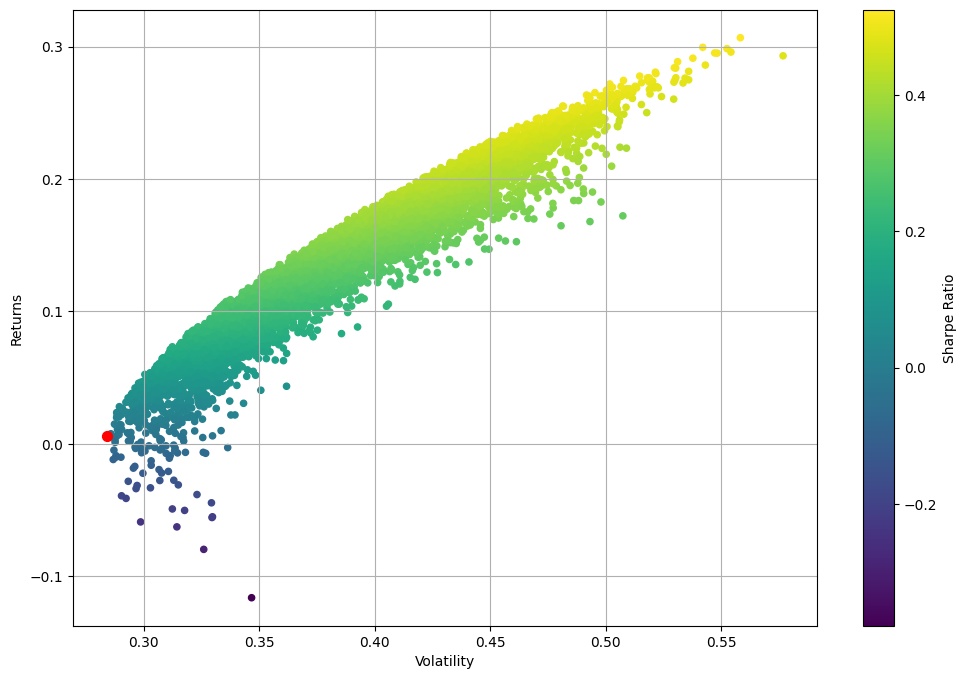

In [34]:
portfolios_poor.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port_poor[1], min_var_port_poor[0], color='r', s=50)

# Max Sharpe Ratio

$$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$

In [35]:
((portfolios_good['Returns']-rf)/portfolios_good['Volatility']).idxmax()

7744

In [36]:
((portfolios_poor['Returns']-rf)/portfolios_poor['Volatility']).idxmax()

4474

In [37]:
optimal_risky_port_good = portfolios_good.iloc[((portfolios_good['Returns']-rf)/portfolios_good['Volatility']).idxmax()]
optimal_risky_port_good

Returns         0.279030
Volatility      0.313465
APAM weight     0.032395
PSK weight      0.011913
TMV weight      0.028460
TPL weight      0.312004
WPM weight      0.615228
Sharpe Ratio    0.842296
Name: 7744, dtype: float64

In [38]:
optimal_risky_port_poor = portfolios_poor.iloc[((portfolios_poor['Returns']-rf)/portfolios_poor['Volatility']).idxmax()]
optimal_risky_port_poor

Returns         0.299409
Volatility      0.542010
ATI weight      0.323561
CIA weight      0.003839
CLF weight      0.571892
CRS weight      0.026430
EVR weight      0.074277
Sharpe Ratio    0.524731
Name: 4474, dtype: float64

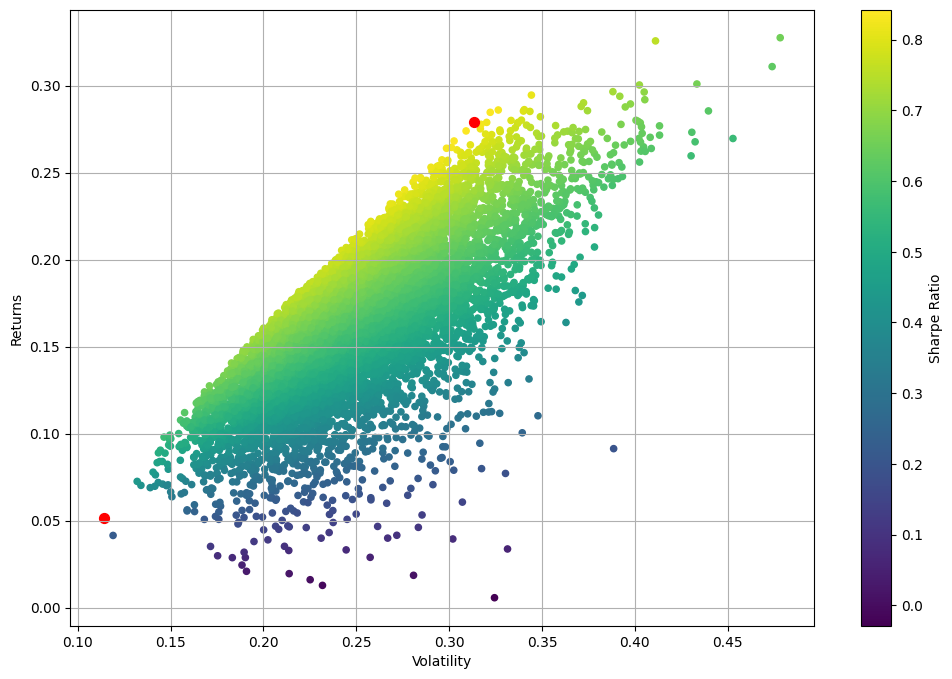

In [39]:
portfolios_good.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port_good[1], min_var_port_good[0], color='r', s=50)
plt.scatter(optimal_risky_port_good[1], optimal_risky_port_good[0], color='r', s= 50)

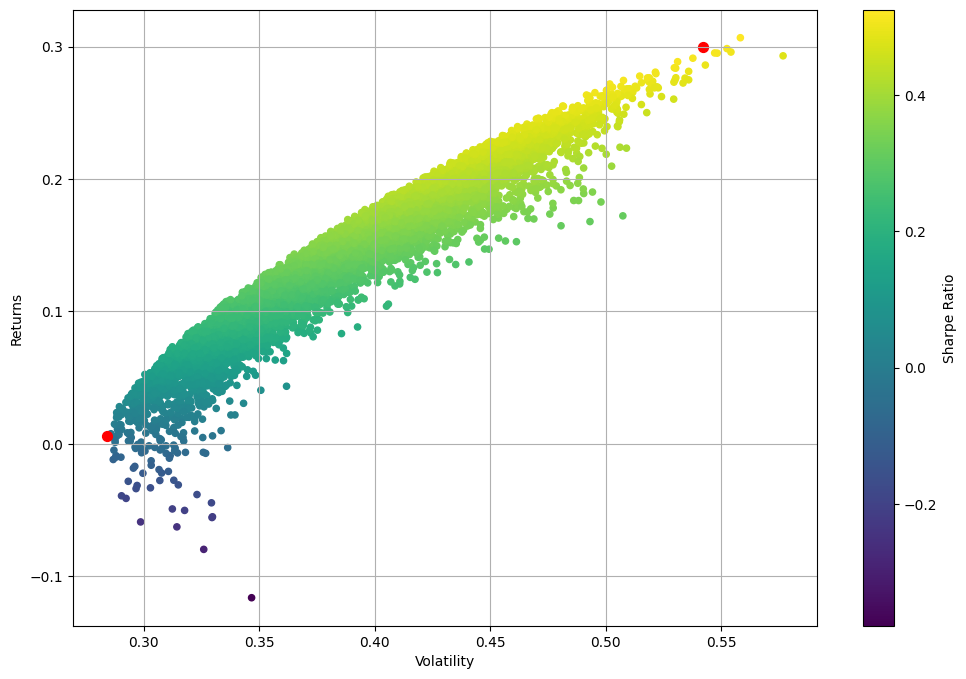

In [40]:
portfolios_poor.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port_poor[1], min_var_port_poor[0], color='r', s=50)
plt.scatter(optimal_risky_port_poor[1], optimal_risky_port_poor[0], color='r', s= 50)

# Capital Allocation Line

$$E(R_P) = rf + \frac{E(R_i)-rf}{\sigma_i}\sigma_p$$

In [41]:
cal_x_good = []
cal_y_good = []

cal_x_poor = []
cal_y_poor = []

In [42]:
for er in np.linspace(rf, max(p_ret_good), 20):
    sd = (er - rf)/((optimal_risky_port_good[0]-rf)/optimal_risky_port_good[1])
    cal_x_good.append(sd)
    cal_y_good.append(er)
    
for er in np.linspace(rf, max(p_ret_poor), 20):
    sd = (er - rf)/((optimal_risky_port_poor[0]-rf)/optimal_risky_port_poor[1])
    cal_x_poor.append(sd)
    cal_y_poor.append(er)

In [43]:
data2_good = {'cal_y':cal_y_good, 'cal_x':cal_x_good}
cal_good = pd.DataFrame(data2_good)
cal_good.head()

,cal_y,cal_x
0,0.015000,0.000000
1,0.031452,0.019532
2,0.047904,0.039065
3,0.064356,0.058597
4,0.080808,0.078130


In [44]:
data2_poor = {'cal_y':cal_y_poor, 'cal_x':cal_x_poor}
cal_poor = pd.DataFrame(data2_poor)
cal_poor.head()

,cal_y,cal_x
0,0.015000,0.000000
1,0.030351,0.029255
2,0.045702,0.058509
3,0.061052,0.087764
4,0.076403,0.117019


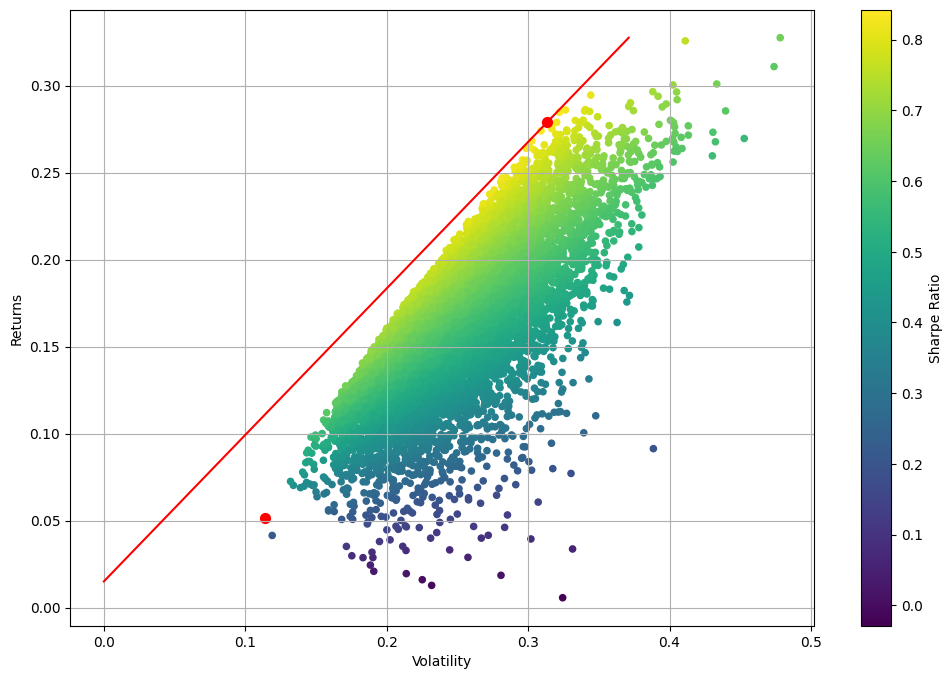

In [45]:
portfolios_good.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port_good[1], min_var_port_good[0], color='r', s=50)
plt.scatter(optimal_risky_port_good[1], optimal_risky_port_good[0], color='r', s= 50)
plt.plot(cal_x_good, cal_y_good, color='r')

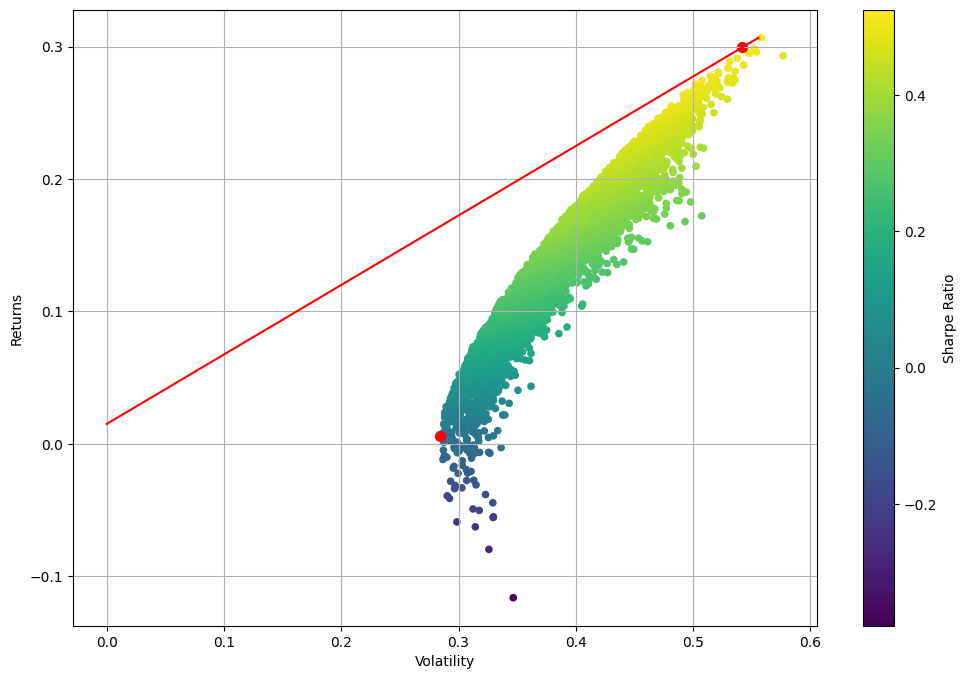

In [46]:
portfolios_poor.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port_poor[1], min_var_port_poor[0], color='r', s=50)
plt.scatter(optimal_risky_port_poor[1], optimal_risky_port_poor[0], color='r', s= 50)
plt.plot(cal_x_poor, cal_y_poor, color='r')

# Efficient Frontier

In [47]:
def get_ret_vol_sr(weights, month_ret):
    weights = np.array(weights)
    ret = np.sum(month_ret.mean() * weights) * 12
    vol = np.sqrt(np.dot(weights.T, np.dot(month_ret.cov()*12, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [48]:
upper_bound_good = max(data_good["Returns"]) 
lower_bound_good = min(data_good["Returns"])
frontier_y_good = np.linspace(lower_bound_good - 0.05, upper_bound_good + 0.05, 50)

upper_bound_poor = max(data_poor["Returns"]) 
lower_bound_poor = min(data_poor["Returns"])
frontier_y_poor = np.linspace(lower_bound_poor - 0.05, upper_bound_poor + 0.05, 50)

In [49]:
def minimize_volatility(weights, month_ret):
    return get_ret_vol_sr(weights, month_ret)[1]

In [50]:
bounds_good = tuple( [ (0,1) for i in range(count_good) ] )
bounds_poor = tuple( [ (0,1) for i in range(count_poor) ] )

init_guess_good = [1/count_good] * count_good
init_guess_poor = [1/count_poor] * count_poor

In [51]:
frontier_x_good = []

for possible_return in frontier_y_good:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w, month_ret_good)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess_good, month_ret_good, method='SLSQP', bounds=bounds_good, constraints=cons)
    frontier_x_good.append(result['fun'])
    
    
frontier_x_poor = []

for possible_return in frontier_y_poor:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w, month_ret_poor)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess_poor, month_ret_poor, method='SLSQP', bounds=bounds_poor, constraints=cons)
    frontier_x_poor.append(result['fun'])

<Figure size 1200x800 with 0 Axes>

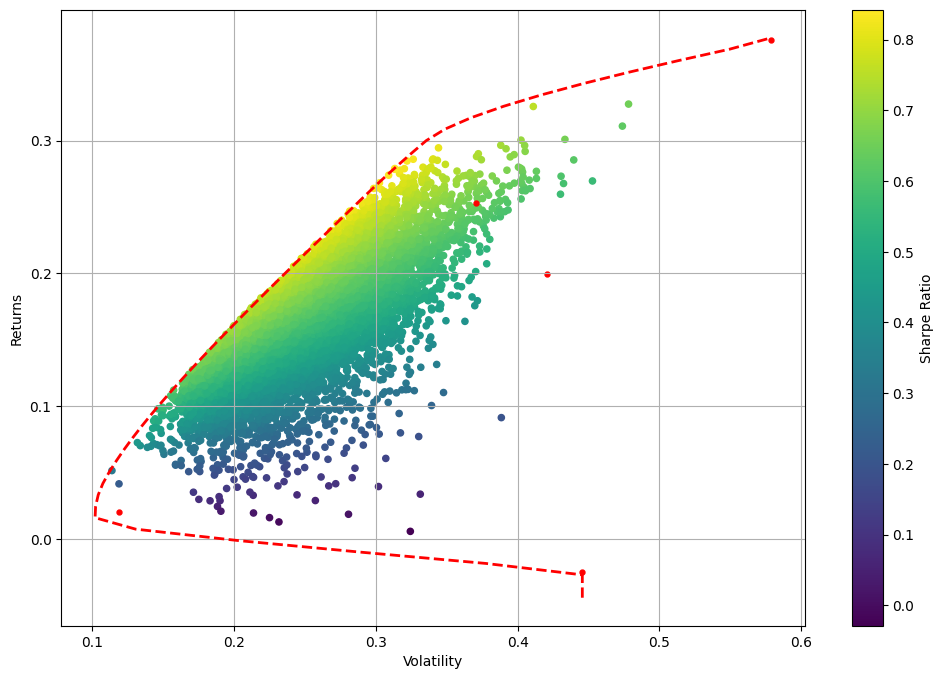

In [52]:
plt.figure(figsize=(12,8))
portfolios_good.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.plot(frontier_x_good,frontier_y_good, 'r--', linewidth=2)

# plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
# plt.scatter(min_var_vol, min_var_ret,c='red',marker='x', s=50) # red dot
# plt.scatter(max_sr_vol2, max_sr_ret2,c='purple', s=50) # red dot
# plt.scatter(min_var_vol2, min_var_ret2,c='purple',marker='x', s=50) # red dot

plt.scatter(std_good, mean_good,c='red',marker='.', s=50) # red dot
# plt.savefig('cover.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

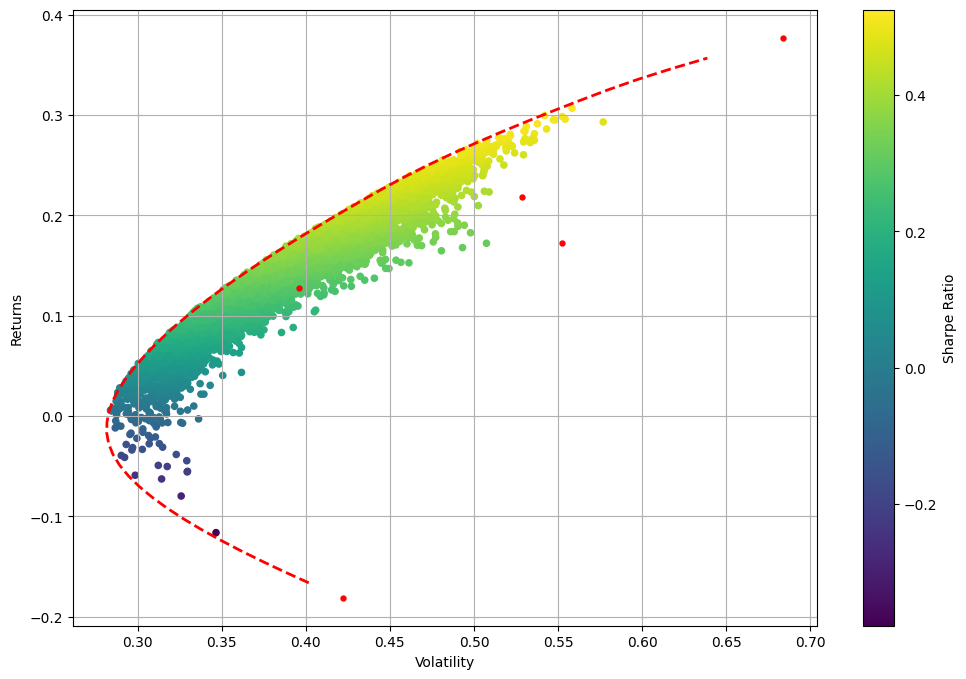

In [53]:
plt.figure(figsize=(12,8))
portfolios_poor.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.plot(frontier_x_poor,frontier_y_poor, 'r--', linewidth=2)

# plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
# plt.scatter(min_var_vol, min_var_ret,c='red',marker='x', s=50) # red dot
# plt.scatter(max_sr_vol2, max_sr_ret2,c='purple', s=50) # red dot
# plt.scatter(min_var_vol2, min_var_ret2,c='purple',marker='x', s=50) # red dot

plt.scatter(std_poor, mean_poor,c='red',marker='.', s=50) # red dot
# plt.savefig('cover.png')
plt.show()

# Utility Function

In [54]:
A= 4 
portfolios_good["Utility"] = portfolios_good["Returns"] - 0.5 * A * portfolios_good["Volatility"] ** 2
max_u_port_good = portfolios_good.iloc[portfolios_good['Utility'].idxmax()]
max_u_port_good

Returns         0.221986
Volatility      0.257806
APAM weight     0.026907
PSK weight      0.108479
TMV weight      0.107493
TPL weight      0.206964
WPM weight      0.550157
Sharpe Ratio    0.802878
Utility         0.089059
Name: 9339, dtype: float64

In [55]:
portfolios_poor["Utility"] = portfolios_poor["Returns"] - 0.5 * A * portfolios_poor["Volatility"] ** 2
max_u_port_poor = portfolios_poor.iloc[portfolios_poor['Utility'].idxmax()]
max_u_port_poor

Returns         0.107389
Volatility      0.335623
ATI weight      0.174064
CIA weight      0.201610
CLF weight      0.103489
CRS weight      0.013644
EVR weight      0.507192
Sharpe Ratio    0.275275
Utility        -0.117897
Name: 1539, dtype: float64

In [56]:
maximize_u_good = max_u_port_good["Utility"]
max_sigma_good = max(portfolios_good["Volatility"])
min_sigma_good = min(portfolios_good["Volatility"])

indifference_sigma_good = np.linspace(min_sigma_good - 0.025, max_sigma_good, 100)
indifference_return_good = maximize_u_good + 0.5 * A * np.square( indifference_sigma_good )


maximize_u_poor = max_u_port_poor["Utility"]
max_sigma_poor = max(portfolios_poor["Volatility"])
min_sigma_poor = min(portfolios_poor["Volatility"])

indifference_sigma_poor = np.linspace(min_sigma_poor - 0.025, max_sigma_poor, 100)
indifference_return_poor = maximize_u_poor + 0.5 * A * np.square( indifference_sigma_poor )

<Figure size 1200x800 with 0 Axes>

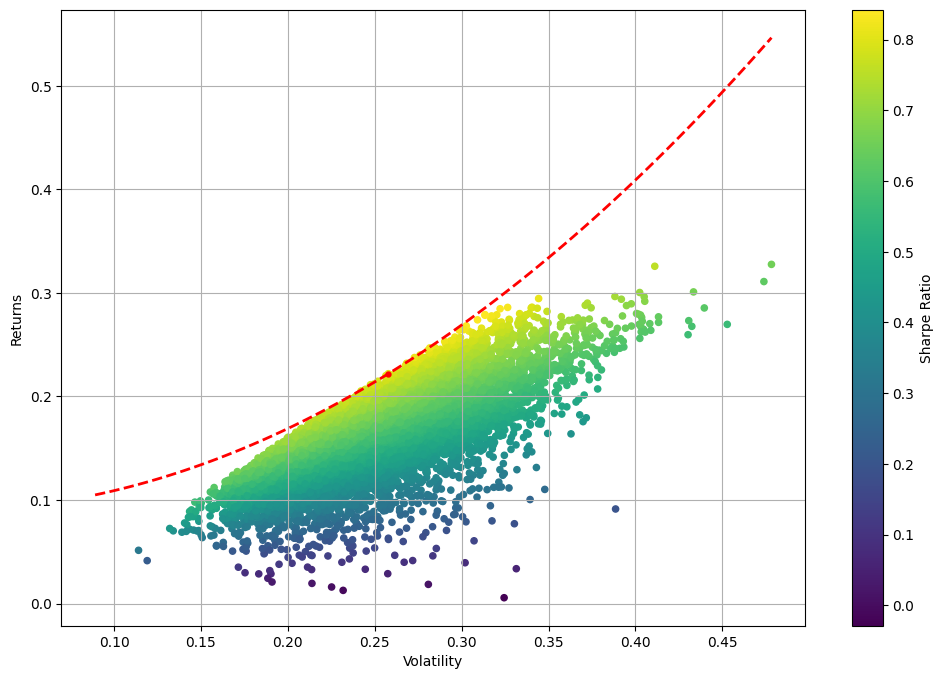

In [57]:
plt.figure(figsize=(12,8))
portfolios_good.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.plot(indifference_sigma_good,indifference_return_good, 'r--', linewidth=2)

plt.scatter(max_u_port_good["Volatility"], max_u_port_good["Returns"],c='red',marker='.', s=50) # red dot

<Figure size 1200x800 with 0 Axes>

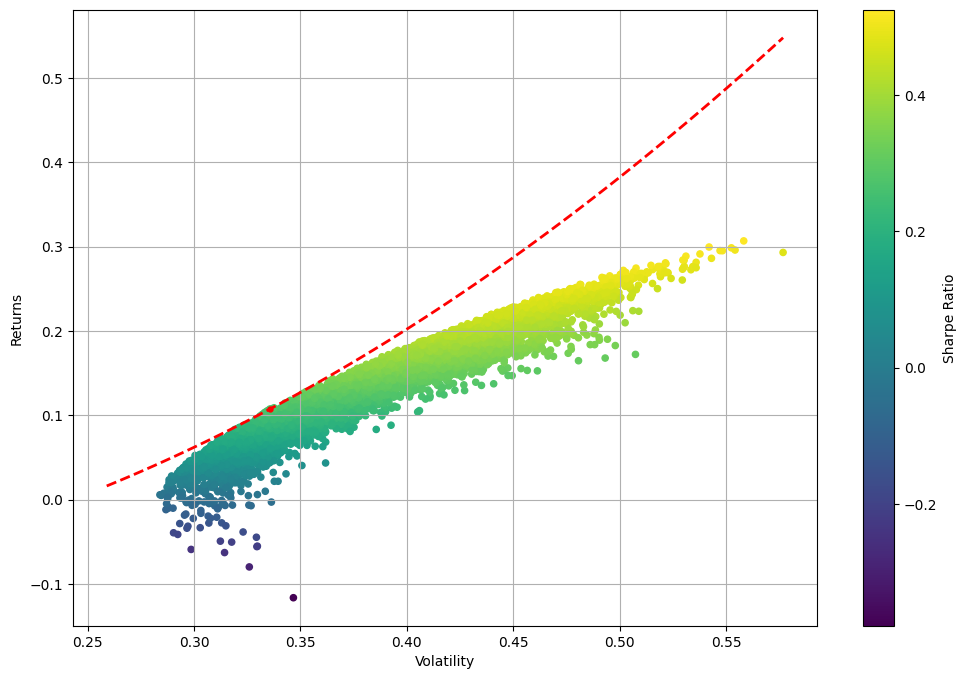

In [58]:
plt.figure(figsize=(12,8))
portfolios_poor.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.plot(indifference_sigma_poor,indifference_return_poor, 'r--', linewidth=2)

plt.scatter(max_u_port_poor["Volatility"], max_u_port_poor["Returns"],c='red',marker='.', s=50) # red dot

# Optimal compelete portfolio

In [59]:
optimal_y_good = (optimal_risky_port_good[0] - rf) / (A*optimal_risky_port_good[1]**2)
optimal_y_good

0.6717622293804474

In [60]:
optimal_u_good = rf + optimal_y_good * (optimal_risky_port_good[0] - rf) - 0.5*A*optimal_y_good**2*optimal_risky_port_good[1]**2
optimal_u_good

0.10368277032088674

In [61]:
optimal_sigma_good = optimal_y_good * optimal_risky_port_good[1]
optimal_er_good = rf + optimal_y_good * (optimal_risky_port_good[0] - rf) 
print("optimal deviation = ", optimal_sigma_good, "\n", 
      "optimal expected return = ", optimal_er_good, sep = '')

optimal deviation = 0.21057394226362242
optimal expected return = 0.19236554064177352


In [62]:
optimal_y_poor = (optimal_risky_port_poor[0] - rf) / (A*optimal_risky_port_poor[1]**2)
optimal_y_poor

0.2420297796414897

In [63]:
optimal_u_poor = rf + optimal_y_poor * (optimal_risky_port_poor[0] - rf) - 0.5*A*optimal_y_poor**2*optimal_risky_port_poor[1]**2
optimal_u_poor

0.0494177671767786

In [64]:
optimal_sigma_poor = optimal_y_poor * optimal_risky_port_poor[1]
optimal_er_poor = rf + optimal_y_poor * (optimal_risky_port_poor[0] - rf) 
print("optimal deviation = ", optimal_sigma_poor, "\n", 
      "optimal expected return = ", optimal_er_poor, sep = '')

optimal deviation = 0.13118263447724055
optimal expected return = 0.0838355343535572


# Summary Graph

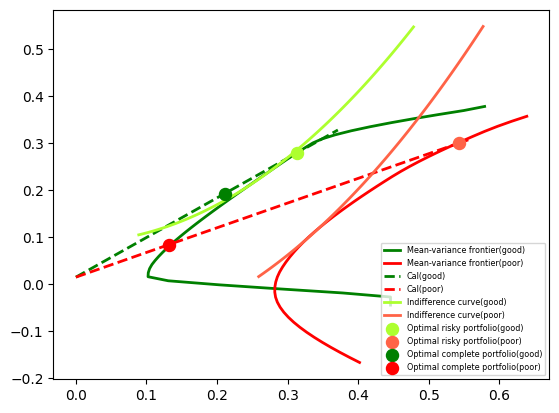

In [65]:
# Mean-var frontiers
plt.plot(frontier_x_good,frontier_y_good, 'g', linewidth=2, label = "Mean-variance frontier(good)")
plt.plot(frontier_x_poor,frontier_y_poor, 'r', linewidth=2, label = "Mean-variance frontier(poor)")

# Cal
plt.plot(cal_x_good, cal_y_good, 'g--', linewidth=2, label = "Cal(good)")
plt.plot(cal_x_poor, cal_y_poor, 'r--', linewidth=2, label = "Cal(poor)")

# Indifference curve
plt.plot(indifference_sigma_good,indifference_return_good, 'greenyellow', linewidth=2, label = "Indifference curve(good)")
plt.plot(indifference_sigma_poor,indifference_return_poor, 'tomato', linewidth=2, label = "Indifference curve(poor)")

# Optimal risky portfolio
plt.scatter(optimal_risky_port_good[1], optimal_risky_port_good[0], c = 'greenyellow', marker='.', s=300, zorder=100, label = "Optimal risky portfolio(good)")
plt.scatter(optimal_risky_port_poor[1], optimal_risky_port_poor[0], c = 'tomato', marker='.', s=300, zorder=100, label = "Optimal risky portfolio(poor)")

# Optimal complete portfolio
plt.scatter(optimal_sigma_good, optimal_er_good, c = 'g', marker='.', s=300, zorder=100, label = "Optimal complete portfolio(good)")
plt.scatter(optimal_sigma_poor, optimal_er_poor, c = 'r', marker='.', s=300, zorder=100, label = "Optimal complete portfolio(poor)")

# legend
plt.legend(loc="lower right", fontsize = "xx-small")